In [1]:
import requests
from bs4 import BeautifulSoup
import re
from IPython.display import Image

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

### Nivell 1

- Exercici 1

Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.

In [3]:
url = 'https://www.bolsamadrid.es'
html = requests.get(url)

In [4]:
soup = BeautifulSoup(html.content, 'html.parser')

+ anem a buscar els valors de les accions de les diferents companyies del IBEX35
+ posarem aquests valors en un dataFrame

In [5]:
# en primer lloc vaig a trobar tots els hyperlinks que tingin el string 'Acciones' 
links = []
for link in soup.find_all('a', string='Acciones'):
    links.append(link.get('href'))

In [6]:
links

['/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000',
 '/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000']

In [7]:
new_url = url+links[0]
new_url

'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

In [8]:
html_acciones = requests.get(new_url)
soup_acciones = BeautifulSoup(html_acciones.content, 'html.parser')

In [9]:
# busco la taula de continguts amb el seguent id especific
tabla_acciones = soup_acciones.find(id='ctl00_Contenido_tblAcciones')

In [10]:
tabla_acciones.find_all('th')

[<th scope="col">Nombre</th>,
 <th scope="col">Últ.</th>,
 <th scope="col">% Dif.</th>,
 <th scope="col">Máx.</th>,
 <th scope="col">Mín.</th>,
 <th scope="col">Volumen</th>,
 <th scope="col">Efectivo (miles €)</th>,
 <th scope="col">Fecha</th>,
 <th class="Ult" scope="col">Hora</th>]

In [11]:
columnas=[]

for element in tabla_acciones.find_all("th"):    
    columnas.append(element.get_text())
    
print(columnas)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']


In [12]:
# guardo tots els valors en aquestas llista
resultados = []
for element in tabla_acciones.find_all("td"):
    resultados.append(element.text)    

In [13]:
# creo un diccionari
datos = {}

In [14]:
# em salto cada 9 elements per tenir els mateix tipus de valors
for i in range(9):
    datos[columnas[i]]=resultados[i::9]

In [15]:
#converteixo el diccionari en un DataFrame
df = pd.DataFrame(datos)

In [16]:
# ja tinc la taula de les 35 companyias del IBEX
df

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"138,6000","1,91","139,7000","136,0000",91.608,"12.700,38",16/06/2021,Cierre
1,ACERINOX,"11,1400","-1,85","11,4450","11,0750",747.514,"8.343,20",16/06/2021,Cierre
2,ACS,"25,2200","-1,25","25,7300","25,2000",717.426,"18.188,83",16/06/2021,Cierre
3,AENA,"143,1000","0,53","144,6000","142,1500",90.511,"12.975,64",16/06/2021,Cierre
4,ALMIRALL,"14,6700","-0,54","14,7800","14,6700",164.823,"2.426,14",16/06/2021,Cierre
5,AMADEUS,"63,7400","-1,18","64,8800","63,5200",924.057,"58.953,16",16/06/2021,Cierre
6,ARCELORMIT.,"25,2150","-2,00","25,9650","24,7150",1.055.072,"26.484,62",16/06/2021,Cierre
7,B.SANTANDER,"3,3640","-1,81","3,4555","3,3430",38.868.740,"131.020,63",16/06/2021,Cierre
8,BA.SABADELL,"0,6096","-4,33","0,6390","0,6076",39.682.961,"24.428,03",16/06/2021,Cierre
9,BANKINTER,"4,3580","-1,74","4,5060","4,3260",2.534.565,"11.082,64",16/06/2021,Cierre


In [17]:
df.to_csv('Acciones_hoy_ibex.csv')
# save data to csv

+ anem a fer una cosa similar amb selenium

In [18]:
# obrim la pagina web a la url disitjada

from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
opts = Options()
opts.set_headless()
assert opts.headless  # Operating in headless mode
#browser = Firefox(options=opts)
browser = Firefox(executable_path = '/home/vant/Descargas/geckodriver-v0.29.1-linux64/geckodriver')
url = 'https://www.bolsamadrid.es'
browser.get(url)

<ipython-input-18-a91e243008e7>:6: DeprecationWarning: use setter for headless property instead of set_headless
  opts.set_headless()


In [19]:
# busquem el link on tenim el string "Acciones" i cliquem
links = browser.find_elements_by_link_text('Acciones')
links[0].click()

In [20]:
# un cop a la nova finestra busquem els valors de la taula
table = browser.find_element_by_id('ctl00_Contenido_tblAcciones')

In [21]:
columnas=[]

for element in table.find_elements_by_tag_name("th"):    
    columnas.append(element.text)
    
print(columnas)    

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']


In [22]:
# guardo tots els valors en aquestas llista
resultados = []
for element in table.find_elements_by_tag_name("td"):
    resultados.append(element.text)    

In [23]:
# em salto cada 9 elements per tenir els mateix tipus de valors
datos = {}
for i in range(9):
    datos[columnas[i]]=resultados[i::9]

pd.DataFrame(datos)    

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"138,6000","1,91","139,7000","136,0000",91.608,"12.700,38",16/06/2021,Cierre
1,ACERINOX,"11,1400","-1,85","11,4450","11,0750",747.514,"8.343,20",16/06/2021,Cierre
2,ACS,"25,2200","-1,25","25,7300","25,2000",717.426,"18.188,83",16/06/2021,Cierre
3,AENA,"143,1000","0,53","144,6000","142,1500",90.511,"12.975,64",16/06/2021,Cierre
4,ALMIRALL,"14,6700","-0,54","14,7800","14,6700",164.823,"2.426,14",16/06/2021,Cierre
5,AMADEUS,"63,7400","-1,18","64,8800","63,5200",924.057,"58.953,16",16/06/2021,Cierre
6,ARCELORMIT.,"25,2150","-2,00","25,9650","24,7150",1.055.072,"26.484,62",16/06/2021,Cierre
7,B.SANTANDER,"3,3640","-1,81","3,4555","3,3430",38.868.740,"131.020,63",16/06/2021,Cierre
8,BA.SABADELL,"0,6096","-4,33","0,6390","0,6076",39.682.961,"24.428,03",16/06/2021,Cierre
9,BANKINTER,"4,3580","-1,74","4,5060","4,3260",2.534.565,"11.082,64",16/06/2021,Cierre


In [24]:
df.to_csv('Acciones_hoy_ibex_v2.csv')
# save data to csv

In [25]:
browser.close()

### Nivell 2

- Exercici 2

Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

*** la informacio del word es pot trobar al word adjunt ****

In [26]:
df =pd.read_csv('Acciones_hoy_ibex_v2.csv')
#df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
df.head()

,Unnamed: 0,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,0,ACCIONA,"138,6000","1,91","139,7000","136,0000",91.608,"12.700,38",16/06/2021,Cierre
1,1,ACERINOX,"11,1400","-1,85","11,4450","11,0750",747.514,"8.343,20",16/06/2021,Cierre
2,2,ACS,"25,2200","-1,25","25,7300","25,2000",717.426,"18.188,83",16/06/2021,Cierre
3,3,AENA,"143,1000","0,53","144,6000","142,1500",90.511,"12.975,64",16/06/2021,Cierre
4,4,ALMIRALL,"14,6700","-0,54","14,7800","14,6700",164.823,"2.426,14",16/06/2021,Cierre


In [28]:
df['Últ.'] =df['Últ.'].str.replace(',','.').astype(float)
df['% Dif.'] =df['% Dif.'].str.replace(',','.').astype(float)
df['Máx.'] =df['Máx.'].str.replace(',','.').astype(float)
df['Mín.'] =df['Mín.'].str.replace(',','.').astype(float)
df['Efectivo (miles €)'] =df['Efectivo (miles €)'].str.replace('.','').str.replace(',','.').astype(float)

In [29]:
df.head()

,Unnamed: 0,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,0,ACCIONA,138.60,1.91,139.700,136.000,91.608,12700.38,16/06/2021,Cierre
1,1,ACERINOX,11.14,-1.85,11.445,11.075,747.514,8343.20,16/06/2021,Cierre
2,2,ACS,25.22,-1.25,25.730,25.200,717.426,18188.83,16/06/2021,Cierre
3,3,AENA,143.10,0.53,144.600,142.150,90.511,12975.64,16/06/2021,Cierre
4,4,ALMIRALL,14.67,-0.54,14.780,14.670,164.823,2426.14,16/06/2021,Cierre


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35 non-null     int64  
 1   Nombre              35 non-null     object 
 2   Últ.                35 non-null     float64
 3   % Dif.              35 non-null     float64
 4   Máx.                35 non-null     float64
 5   Mín.                35 non-null     float64
 6   Volumen             35 non-null     object 
 7   Efectivo (miles €)  35 non-null     float64
 8   Fecha               35 non-null     object 
 9   Hora                35 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 2.9+ KB


### Nivell 3


- Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

In [31]:
from scrapy import Selector

In [32]:
url ='https://www.lavanguardia.com'

In [33]:
# llegim la pagina web i guardem en contingut HTML
html = requests.get(url).content

In [34]:
# parsegem el contingut HTML amb la llibreria Selector de scrapy
sel = Selector (text = html)

In [35]:
# seleccionem dins la divisio que te la clase anomenada "header-menu" tots els hyperlinks
links = sel.xpath ('//div[@class="header-menu"]//a/@href').extract()
links

['/alminuto',
 '/internacional',
 '/politica',
 '/opinion',
 'https://www.lavanguardia.com/vida',
 '/deportes',
 '/economia',
 '/local',
 '/gente',
 '/cultura',
 '/sucesos']

In [36]:
outcome = []
for link in links:
    #busquem aquells links on apareixi el string "politica"
    if 'politica' in link:
        outcome.append(link)
        break

In [37]:
outcome

['/politica']

In [38]:
# anem a la seccio politica
html = requests.get(url+outcome[0]).content

In [39]:
# parsegem el contingut HTML amb la llibreria Selector de scrapy
sel = Selector (text = html)

In [40]:
# volem trobar tots els tags "articles" i el seu text associat 
news_headlines = sel.xpath ('//article/div/h2/a/text()').extract()

In [41]:
news_headlines[:10]

['El PSOE pacta con Podemos una regulación de los alquileres',
 'El juez sienta en el banquillo a Jordi Pujol y a sus siete hijos',
 'Sánchez: “No usaremos la constitución, la bandera y la monarquía para dividir a los españoles”',
 'Aragonès y la CUP se enfrentan por la presencia del Govern en la cena con el Rey',
 'Cinco años de cárcel para un independentista por manifestarse contra Jusapol',
 'Borràs se vuelve a enzarzar con Ciutadans y Vox a cuenta del reglamento del Parlament',
 'Alba Vergés, elegida vicepresidenta primera del Parlament',
 'Calvo mantendrá el delito de opinión franquista en la ley de Memoria, pese al informe del CGPJ',
 'La juez abre diligencias a Errejón por la presunta patada que propinó a un hombre en Lavapiés',
 'El Govern descarta abrir la mesa catalana de partidos antes de reunirse con el Gobierno']

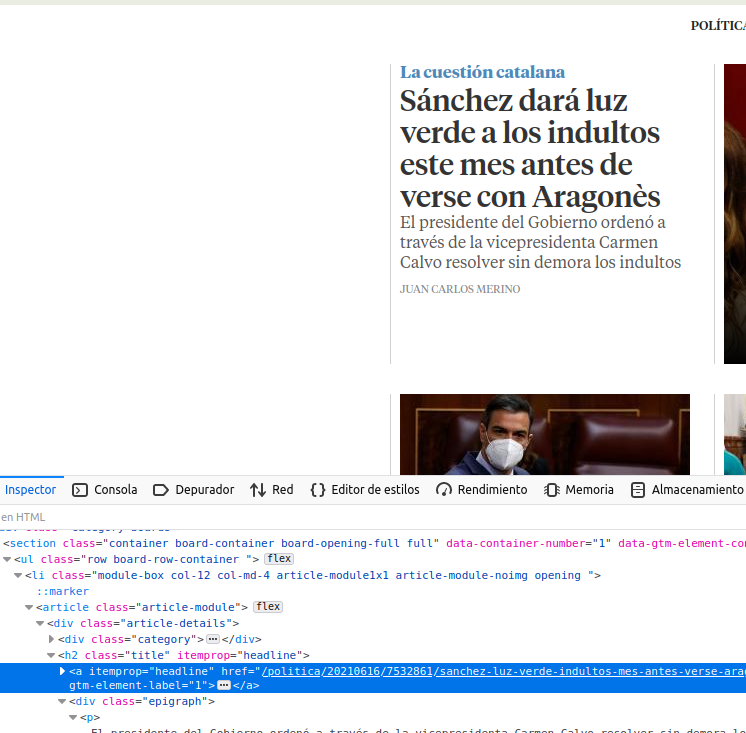

In [42]:
# snapshop de la part que volem analitzar
Image("web.png")

+ a traves de Scapy es pot fer un Crawler que vagi de web en web buscant paraules clau

In [43]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [44]:
class MyOwnCrawler(scrapy.Spider):
    name = "MFF_crawler"    
    
    def start_requests(self):
        urls = ['https://www.ub.edu/portal/web/fisica']
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)
 
    def parse(self, response):
         # busquem tots els links
        links = response.xpath('//a/@href').extract()
        texts = response.xpath('//a/text()').extract()
        for text in texts:
            if '@' in text:
                print(text)
        for link in links:
            yield scrapy.Request(link, callback = self.parse2)
                
    def parse2(self,response):
        texts = response.xpath('//a/text()').extract()
        for text in texts:
            if '@' in text:
                print(text)
        
        
        
        

In [45]:
#iniciar crawler
process = CrawlerProcess()
# tell the process which spider to use
process.crawl(MyOwnCrawler)
# start the crawling process
process.start()

2021-06-16 19:11:31 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-06-16 19:11:31 [scrapy.utils.log] INFO: Versions: lxml 4.6.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.8.5 (default, May 27 2021, 13:30:53) - [GCC 9.3.0], pyOpenSSL 19.0.0 (OpenSSL 1.1.1f  31 Mar 2020), cryptography 2.8, Platform Linux-5.8.0-55-generic-x86_64-with-glibc2.29
2021-06-16 19:11:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2021-06-16 19:11:31 [scrapy.crawler] INFO: Overridden settings:
{}
2021-06-16 19:11:31 [scrapy.extensions.telnet] INFO: Telnet Password: 10d9e4ba3f991089
2021-06-16 19:11:31 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2021-06-16 19:11:31 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloaderm

sec.facultat.fisica@ub.edu


2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/directori> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/estudis> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/practiques-ocupabilitat> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/facultat> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/mobilitat> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/recerca> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19

sec.facultat.fisica@ub.edu
sec.facultat.fisica@ub.edu
sec.facultat.fisica@ub.edu
sec.facultat.fisica@ub.edu
rint-fis@ub.edu
sec.facultat.fisica@ub.edu
sec.facultat.fisica@ub.edu


2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/physics/> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica-es/> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.ub.edu/portal/web/fisica/inici> (referer: https://www.ub.edu/portal/web/fisica)
2021-06-16 19:11:32 [scrapy.core.engine] INFO: Closing spider (finished)
2021-06-16 19:11:32 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 4649,
 'downloader/request_count': 12,
 'downloader/request_method_count/GET': 12,
 'downloader/response_bytes': 473423,
 'downloader/response_count': 12,
 'downloader/response_status_count/200': 11,
 'downloader/response_status_count/301': 1,
 'dupefilter/filtered': 1,
 'elapsed_time_seconds': 1.690152,
 'finish_reason': 'finished',
 'finish_time': da

sec.facultat.fisica@ub.edu
sec.facultat.fisica@ub.edu
sec.facultat.fisica@ub.edu


 + la idea era que aquesta aranya pogues anar als diferents links i anes agafant les adreces electroniques que vagi trobant  